In [1]:
import pandas as pd

In [19]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.1 MB/s eta 0:00:00


In [35]:
df = pd.read_csv('engagements.csv')
df.head()

print(df['media_id'].nunique())


355


In [49]:
import pandas as pd

# Ensure timestamp is datetime type
# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Extract full date and time components
df['date']     = df['timestamp'].dt.date                   # Exact date
df['day']      = df['timestamp'].dt.day                    # Day of month
df['month']    = df['timestamp'].dt.month                  # Month
df['year']     = df['timestamp'].dt.year                   # Year
df['weekday']  = df['timestamp'].dt.day_name()             # Day of week (e.g., Monday)
df['week']     = df['timestamp'].dt.isocalendar().week     # ISO week number
df['hour']     = df['timestamp'].dt.hour                   # Hour of day (0–23)
df['minute']   = df['timestamp'].dt.minute                 # Minute
df['time']     = df['timestamp'].dt.time                   # Exact time (hh:mm:ss)

# Optional: Drop rows with invalid timestamps (if any)
df = df.dropna(subset=['timestamp'])

# Preview the updated DataFrame
# print(df[['timestamp', 'date', 'day', 'month', 'year', 'weekday', 'week']].head())


# Posts per day
posts_per_day = df.groupby('date')['media_id'].nunique()

# Comments per day
comments_per_day = df.groupby('date')['comment_text'].count()



print(posts_per_day)
print(comments_per_day)


df.head(10)


import re

def clean_text_keep_mentions(text):
    # Keep letters, numbers, spaces, and @mentions; remove everything else
    return re.sub(r"[^\w\s@]", "", str(text))

# Apply cleaning
df['clean_comment'] = df['comment_text'].apply(clean_text_keep_mentions)


from collections import Counter

# Group by week and get combined text per week
weekly_comments = df.groupby('week')['clean_comment'].apply(lambda texts: ' '.join(texts)).reset_index()

# Extract top N keywords per week
def get_top_keywords(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

weekly_comments['top_keywords'] = weekly_comments['clean_comment'].apply(get_top_keywords)

# Print top keywords for each week
for _, row in weekly_comments.iterrows():
    print(f"\nWeek {row['week']}:")
    for word, count in row['top_keywords']:
        print(f"   {word}: {count}")


# Extract all @mentions
df['mentions'] = df['comment_text'].str.findall(r'@\w+')
top_mentions = df['mentions'].explode().value_counts().head(10)
top_mentions


# Compare word frequencies across weeks to spot new interest
weekly_word_counts = df.groupby('week')['clean_comment'].apply(lambda x: ' '.join(x).split())

df['comment_length'] = df['comment_text'].str.len()
import emoji
from collections import Counter

# Ensure comment_text is string (safe against NaN)
def extract_emojis(text):
    text = str(text)
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

# Apply the emoji extractor
df['emojis'] = df['comment_text'].apply(extract_emojis)

# Combine all emojis into one big string
all_emojis = ''.join(df['emojis'])

# Count the most frequent emojis
emoji_counts = Counter(all_emojis)
top_emojis = emoji_counts.most_common(150)

# Print top emojis
for emoji_char, count in top_emojis:
    print(f"{emoji_char} : {count} times")


import emoji
from collections import defaultdict

# Emoji categories (as before)
emoji_categories = {
    'love':       ['😍','🥰','❤️','💕','💖','💗','💓','💞','💝','💘','🫶','💌','❣'],
    'beauty':     ['✨','💫','😻','🤩','👀','😋','💅','🧴','🪷','🫧'],
    'hype':       ['🔥','🙌','👏','💯','🤌','💥','🎉','✅','‼','🎯','💀'],
    'tropical':   ['🥥','🍊','🍍','🍓','🍋','🌸','🌺','🌷','🌻','🌿','🍒','☀','🌞','🌴','🌊','🌱'],
    'sad':        ['😢','😭','🥺','🥹','😿'],
    'angry':      ['😡','😠','🤬','😤','👿','😒','😾'],
    'confused':   ['🤔','😕','🙃','😐','😶','🫤','🤷','🤦','🙄'],
    'playful':    ['😂','🤣','😆','😅','😉','😜','😇','🤭','🥳','😄','😎','😁','😀'],
    'hopeful':    ['🙏','🤞','☘','🍀'],
    'shopping':   ['👍','💯','👌','✅','💵','🧴','💅','💍','💌']
}

# Flatten to emoji -> category
emoji_to_category = {emj: cat for cat, emjs in emoji_categories.items() for emj in emjs}

# Extract emojis
def extract_emojis(text):
    return ''.join(char for char in str(text) if char in emoji.EMOJI_DATA)

# Map emojis to categories
def get_emoji_categories(emoji_str):
    found = set()
    for char in str(emoji_str):
        if char in emoji_to_category:
            found.add(emoji_to_category[char])
    return list(found) if found else ['none']

# Apply to DataFrame
df['emojis'] = df['comment_text'].apply(extract_emojis)
df['emoji_categories'] = df['emojis'].apply(get_emoji_categories)

df.groupby('weekday')['emoji_categories'].apply(lambda x: x.explode().value_counts())

date
2025-03-01    59
2025-03-02    38
2025-03-03    41
2025-03-04    48
2025-03-05    55
2025-03-06    57
2025-03-07    46
2025-03-08    50
2025-03-09    40
2025-03-10    39
2025-03-11    51
2025-03-12    41
2025-03-13    46
2025-03-14    31
2025-03-15    41
2025-03-16    42
2025-03-17    35
2025-03-18    43
2025-03-19    45
2025-03-20    55
2025-03-21    74
2025-03-22    41
2025-03-23    47
2025-03-24    38
2025-03-25    48
2025-03-26    36
2025-03-27    31
2025-03-28    39
2025-03-29    40
2025-03-30    44
2025-03-31    48
2025-04-01    42
2025-04-02    50
Name: media_id, dtype: int64
date
2025-03-01     160
2025-03-02     108
2025-03-03     131
2025-03-04     192
2025-03-05     276
2025-03-06     279
2025-03-07     137
2025-03-08      94
2025-03-09      74
2025-03-10    1127
2025-03-11    1031
2025-03-12     320
2025-03-13     192
2025-03-14     149
2025-03-15     137
2025-03-16     245
2025-03-17     560
2025-03-18     449
2025-03-19     209
2025-03-20     162
2025-03-21    3494
2

weekday            
Friday     none        3125
           love         406
           beauty       160
           hype         159
           tropical      67
                       ... 
Wednesday  tropical      66
           shopping      16
           hopeful       13
           confused      11
           angry          1
Name: emoji_categories, Length: 74, dtype: int64

In [48]:
df.head(10)

,timestamp,media_id,media_caption,comment_text,date,day,month,year,weekday,week,hour,minute,time,clean_comment,mentions,emojis,emoji_categories,comment_length
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,2025-03-01,1,3,2025,Saturday,9,0,13,00:13:57.153000,I bet this is good,[],,[none],18.0
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,2025-03-01,1,3,2025,Saturday,9,0,23,00:23:06.879000,i know this smells so good,[],,[none],26.0
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,2025-03-01,1,3,2025,Saturday,9,0,4,00:04:05.094000,Love it,[],,[none],7.0
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,2025-03-01,1,3,2025,Saturday,9,0,41,00:41:59.467000,Please carry these in Canada I miss them so much,[],,[none],50.0
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,2025-03-01,1,3,2025,Saturday,9,2,21,02:21:29.715000,I love it,[],✌,[none],14.0
5,2025-03-01 01:20:26.410000+00:00,1092654676238221,My go-to for waking up my skin! 🍊🫧 Click the l...,Anndy Marin,2025-03-01,1,3,2025,Saturday,9,1,20,01:20:26.410000,Anndy Marin,[],,[none],11.0
6,2025-03-01 01:28:03.566000+00:00,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,Shaheena Juliet Castellano Flavors?🧐\nI know y...,2025-03-01,1,3,2025,Saturday,9,1,28,01:28:03.566000,Shaheena Juliet Castellano Flavors\nI know you...,[],🧐👩🏽🦯➡,[none],96.0
7,2025-03-01 02:12:43.282000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@brittany_lollar,2025-03-01,1,3,2025,Saturday,9,2,12,02:12:43.282000,@brittany_lollar,[@brittany_lollar],,[none],17.0
8,2025-03-01 02:05:51.661000+00:00,1020629436774079,Which WintHER scrub fits your vibe✨,Emerald,2025-03-01,1,3,2025,Saturday,9,2,5,02:05:51.661000,Emerald,[],,[none],7.0
9,2025-03-01 02:27:01.167000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@kalwone,2025-03-01,1,3,2025,Saturday,9,2,27,02:27:01.167000,@kalwone,[@kalwone],,[none],9.0


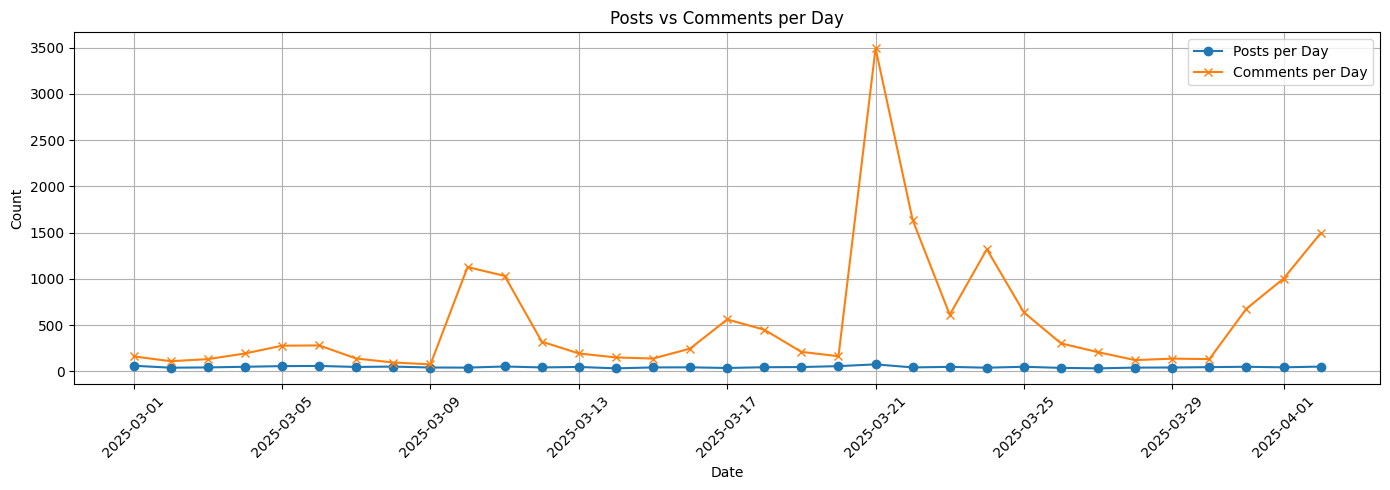


Top 10 Mentions:
 mentions
@treehut                406
@colleen_stevenson76     13
@ultabeauty              10
@_                       10
@paulreactss              9
@woodsyamphibian          9
@mariebucksland           9
@kiralee725               8
@ndnmomma782024           8
@sabrina_86               8
Name: count, dtype: int64


/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 129655 (\U0001fa77) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 129381 (\N{COCONUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-779770567.py:80: UserWarning: Glyph 127802 (\N{HIBISCUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-50-7797705

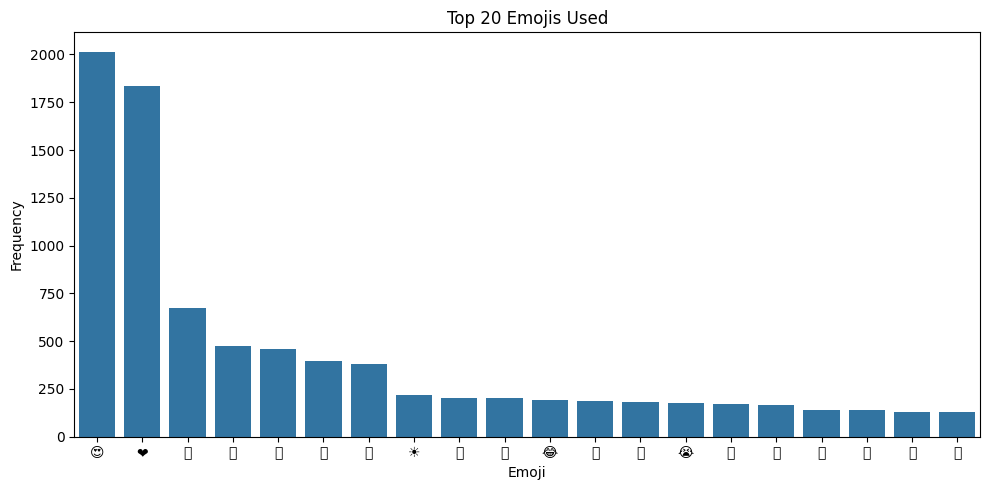

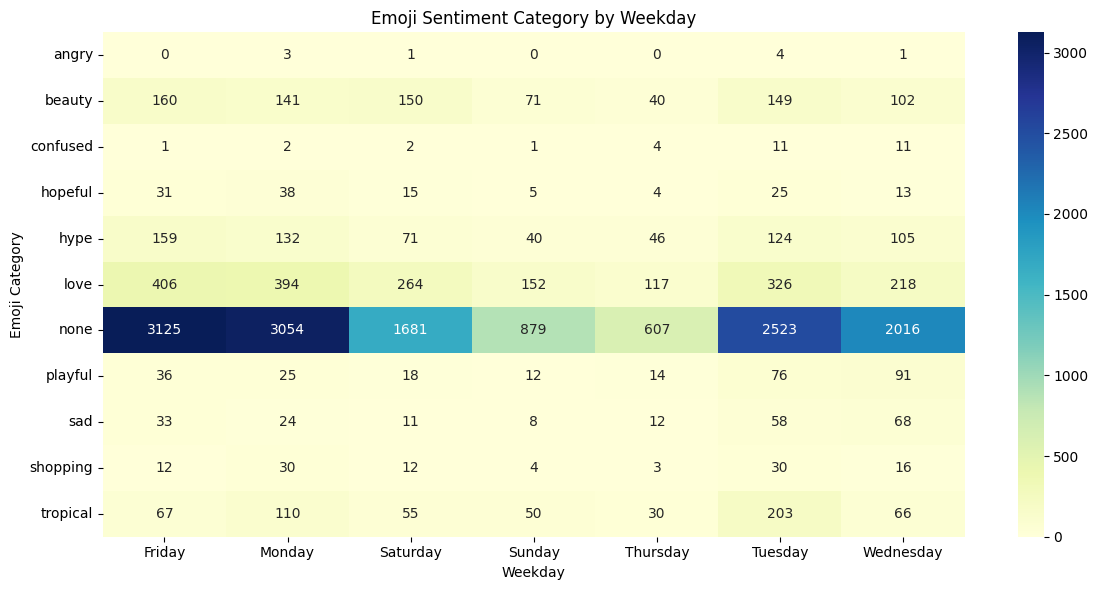

In [50]:
# --- Tree Hut Instagram Comment Analysis ---
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Step 1: Timestamp Parsing & Time Features ---
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])

df['date'] = df['timestamp'].dt.date
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['weekday'] = df['timestamp'].dt.day_name()
df['week'] = df['timestamp'].dt.isocalendar().week
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['time'] = df['timestamp'].dt.time

# --- Step 2: Activity Metrics ---
posts_per_day = df.groupby('date')['media_id'].nunique()
comments_per_day = df.groupby('date')['comment_text'].count()

# Plot posts and comments per day
plt.figure(figsize=(14, 5))
posts_per_day.plot(label='Posts per Day', marker='o')
comments_per_day.plot(label='Comments per Day', marker='x')
plt.title('Posts vs Comments per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Step 3: Clean Comment Text ---
def clean_text_keep_mentions(text):
    return re.sub(r"[^\w\s@]", "", str(text))

df['clean_comment'] = df['comment_text'].apply(clean_text_keep_mentions)

# --- Step 4: Weekly Top Keywords ---
weekly_comments = df.groupby('week')['clean_comment'].apply(lambda texts: ' '.join(texts)).reset_index()

def get_top_keywords(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

weekly_comments['top_keywords'] = weekly_comments['clean_comment'].apply(get_top_keywords)

# --- Step 5: Top @Mentions ---
df['mentions'] = df['comment_text'].str.findall(r'@\w+')
top_mentions = df['mentions'].explode().value_counts().head(10)
print("\nTop 10 Mentions:\n", top_mentions)

# --- Step 6: Comment Length ---
df['comment_length'] = df['comment_text'].str.len()

# --- Step 7: Emoji Extraction ---
def extract_emojis(text):
    return ''.join(char for char in str(text) if char in emoji.EMOJI_DATA)

df['emojis'] = df['comment_text'].apply(extract_emojis)

all_emojis = ''.join(df['emojis'])
emoji_counts = Counter(all_emojis)
top_emojis = emoji_counts.most_common(20)

# Plot top emojis
emojis, counts = zip(*top_emojis)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(emojis), y=list(counts))
plt.title('Top 20 Emojis Used')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Step 8: Emoji Sentiment Categorization ---
emoji_categories = {
    'love': ['😍','🥰','❤️','💕','💖','💗','💓','💞','💝','💘','🫶','💌','❣'],
    'beauty': ['✨','💫','😻','🤩','👀','😋','💅','🧴','🪷','🫧'],
    'hype': ['🔥','🙌','👏','💯','🤌','💥','🎉','✅','‼','🎯','💀'],
    'tropical': ['🥥','🍊','🍍','🍓','🍋','🌸','🌺','🌷','🌻','🌿','🍒','☀','🌞','🌴','🌊','🌱'],
    'sad': ['😢','😭','🥺','🥹','😿'],
    'angry': ['😡','😠','🤬','😤','👿','😒','😾'],
    'confused': ['🤔','😕','🙃','😐','😶','🫤','🤷','🤦','🙄'],
    'playful': ['😂','🤣','😆','😅','😉','😜','😇','🤭','🥳','😄','😎','😁','😀'],
    'hopeful': ['🙏','🤞','☘','🍀'],
    'shopping': ['👍','💯','👌','✅','💵','🧴','💅','💍','💌']
}
emoji_to_category = {e: cat for cat, ems in emoji_categories.items() for e in ems}

def get_emoji_categories(emoji_str):
    found = set()
    for char in str(emoji_str):
        if char in emoji_to_category:
            found.add(emoji_to_category[char])
    return list(found) if found else ['none']

df['emoji_categories'] = df['emojis'].apply(get_emoji_categories)

# --- Step 9: Plot Emoji Sentiment by Weekday ---
weekday_emoji_sentiment = df.groupby('weekday')['emoji_categories'].apply(lambda x: x.explode().value_counts()).unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(weekday_emoji_sentiment.T, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Emoji Sentiment Category by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Emoji Category")
plt.tight_layout()
plt.show()

# --- Step 10: Export Final Data ---
df.to_csv("treehut_comment_analysis.csv", index=False)

In [52]:
import pandas as pd
from textblob import TextBlob

# Step 1: Ensure timestamp is in datetime format (optional if done earlier)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Step 2: Remove any existing caption_sentiment columns (to avoid duplicates)
df = df.drop(columns=[col for col in df.columns if "caption_sentiment" in col], errors='ignore')

# Step 3: Create a separate DataFrame with one caption per media_id
caption_df = df[['media_id', 'media_caption']].drop_duplicates()

# Step 4: Define sentiment analysis function using TextBlob
def get_caption_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity  # value from -1 (negative) to +1 (positive)
    except:
        return 0.0

# Step 5: Apply sentiment function to each media caption
caption_df['caption_sentiment'] = caption_df['media_caption'].apply(get_caption_sentiment)

# Step 6: Merge the sentiment score back into the main DataFrame
df = df.merge(caption_df[['media_id', 'caption_sentiment']], on='media_id', how='left')

# Step 7: Optional - Preview results
print(df[['media_id', 'media_caption', 'caption_sentiment']].drop_duplicates().head(10))

             media_id                                      media_caption  \
0    1090986906404998  Soft skin, soft life 🩷🌸🫧 get your hands on thi...   
1   17950254656929862  Why use one scrub when you can use them all at...   
2    1090109319826090  Morning routine with Tree Hut 🍊🫧 Now available...   
3    1098364052333950  Why use one scrub when you can use them all at...   
4    1083943630442659  Vanilla Serum-Infused Hand Wash: A sweet escap...   
5    1092654676238221  My go-to for waking up my skin! 🍊🫧 Click the l...   
6    1091806986322990  My go-to for waking up my skin! 🍊🫧 Click the l...   
7   18021315083459733  Orange you glad it’s giveaway time?! 🍊✨\n\nTha...   
8    1020629436774079                Which WintHER scrub fits your vibe✨   
12   1090857956417893  Soft skin, soft life 🩷🌸🫧 get your hands on thi...   

    caption_sentiment  
0            0.112500  
1            0.000000  
2            0.500000  
3            0.000000  
4            0.141667  
5            0.0000

In [53]:
df.groupby('weekday')['caption_sentiment'].mean().sort_values()

,caption_sentiment
weekday,
Friday,-0.008728
Saturday,0.045908
Sunday,0.105898
Wednesday,0.119949
Tuesday,0.157156
Thursday,0.168594
Monday,0.172092


In [54]:
df.groupby(pd.qcut(df['caption_sentiment'], 3))['emoji_categories'].apply(lambda x: x.explode().value_counts())

/tmp/ipython-input-54-1164120502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['caption_sentiment'], 3))['emoji_categories'].apply(lambda x: x.explode().value_counts())


caption_sentiment          
(-0.876, -0.0333]  none        5151
                   love         702
                   beauty       392
                   hype         239
                   playful       73
                   sad           71
                   tropical      67
                   hopeful       46
                   shopping      17
                   confused      10
                   angry          3
(-0.0333, 0.169]   none        4586
                   love         471
                   beauty       205
                   hype         175
                   playful      121
                   tropical     112
                   sad           94
                   shopping      31
                   hopeful       29
                   confused      13
                   angry          5
(0.169, 1.0]       none        4148
                   love         704
                   tropical     402
                   hype         263
                   beauty       216
                   playful       78
                   shopping      59
                   hopeful       56
                   sad           49
                   confused       9
                   angry          1
Name: emoji_categories, dtype: int64

<Axes: xlabel='caption_sentiment', ylabel='comment_text'>

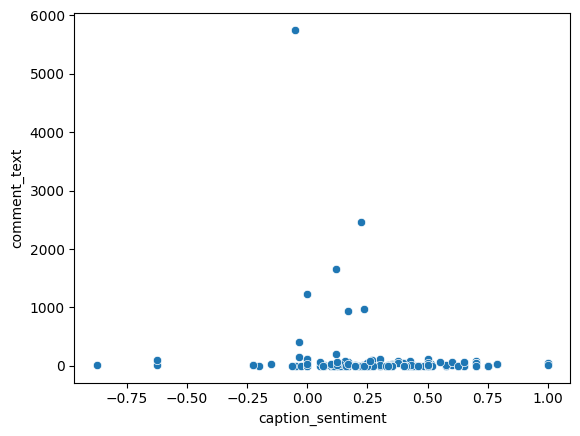

In [55]:
caption_stats = df.groupby('media_id').agg({
    'caption_sentiment': 'first',
    'comment_text': 'count'
}).reset_index()

sns.scatterplot(data=caption_stats, x='caption_sentiment', y='comment_text')